In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [4]:
# define cluster means and SDs
centres = [[1,3], [5,6], [4,1]]
spreads = [[1,0.8], [1.5,0.9], [1.5,1.2]]

In [5]:
# generate random test data
np.random.seed(1)
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

for i, ((xmu,ymu), (xsigma,ysigma)) in enumerate(zip(centres,spreads)):
    xpts = np.hstack((xpts, xmu + xsigma * np.random.standard_normal(200)))
    ypts = np.hstack((ypts, ymu + ysigma * np.random.standard_normal(200)))
    labels = np.hstack((labels, i*np.ones(200)))
    

Text(0.5, 1.0, 'Test data')

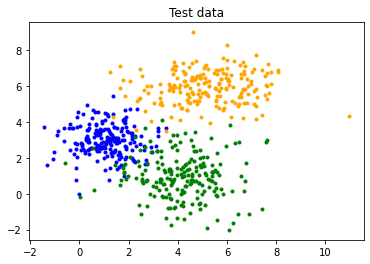

In [6]:
# visualise test data
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.', color=colors[label])
ax0.set_title('Test data')

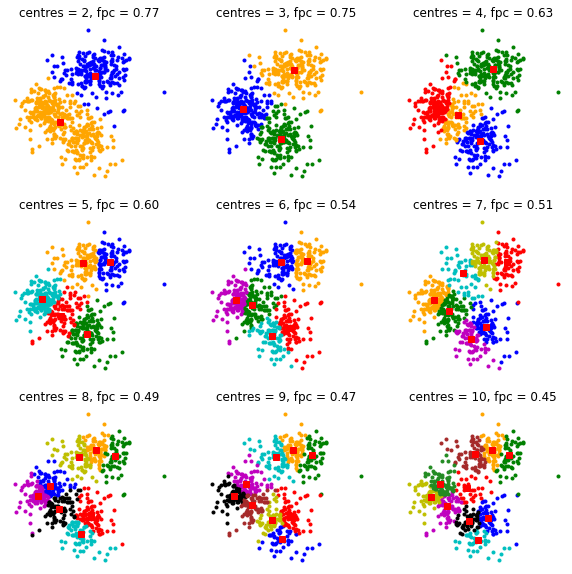

In [22]:
# clustering for best number of classes using fuzzy 
fig1, axs1 = plt.subplots(3,3, figsize=(10,10)) # 9 plots in total
alldata = np.vstack((xpts,ypts))
fpcs = [] # fuzzy partition coeff

# for each figure 

for ncentres, ax in enumerate(axs1.reshape(-1),2): # change enumerate counter to start at 2
    # run cmeans clustering
    centr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncentres, 2, error=0.005, maxiter=1000, init=None
    )

    # store fpc values
    fpcs.append(fpc)

    # plot assigned clusters for each data point in training set
    cluster_membership = np.argmax(u, axis=0) # max indices of rows

    for j in range(ncentres):
        ax.plot(xpts[cluster_membership == j], ypts[cluster_membership == j], '.', color=colors[j])

    # mark the centre of each cluster
    for pt in centr:
        ax.plot(pt[0], pt[1], 'rs')

    # set title
    ax.set_title('centres = {0}, fpc = {1:.2f}'.format(ncentres, fpc))
    ax.axis('off')


Text(0.5, 1.0, 'fpc comparison')

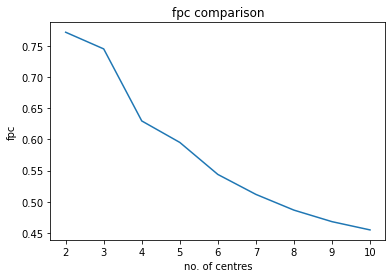

In [23]:
# analyse fuzzy partition coefficient (fpc)
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel('no. of centres')
ax2.set_ylabel('fpc')
ax2.set_title('fpc comparison')

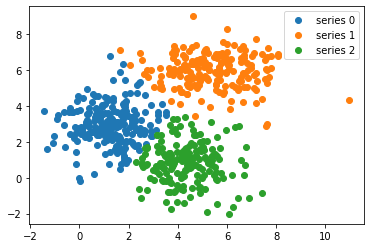

In [26]:
# classifying new data

# build model
centr, u0, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata, 3, 2, error=0.005, maxiter=1000
)

# show 3 cluster model
fig3, ax3 = plt.subplots()
ax2.set_title('trained model')
for j in range(3):
    ax3.plot(alldata[0, u0.argmax(axis=0) == j], alldata[1, u0.argmax(axis=0) == j], 'o', label='series '+str(j))
ax3.legend()

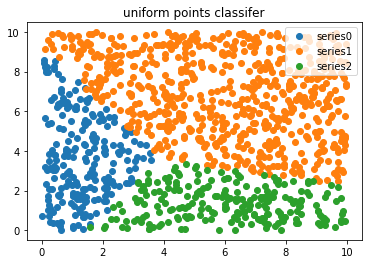

In [38]:
# prediction and generalise on uniform data

# generate uniform data and predict clustering
newdata = np.random.uniform(0,10,(1100,2))

# predict new cluster membership
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    newdata.T, centr, 2, error=0.005, maxiter=1000
)

# plot results
cluster_membership_new = np.argmax(u, axis=0) # crsip for visualisation

fig4, ax4 = plt.subplots()
ax4.set_title('uniform points classifer')
for j in range(3):
    ax4.plot(newdata[cluster_membership_new == j, 0], newdata[cluster_membership_new == j, 1], 'o', label='series'+str(j))

ax4.legend()

plt.show()